In [1]:
import astropy.units as u
import numpy as np
import os
import sys
os.environ['PIXEDFIT_HOME'] = '/nvme/scratch/work/tharvey/piXedfit/'
from ResolvedGalaxy import ResolvedGalaxy, make_EAZY_SED_fit_params_arr
from importlib import reload
from matplotlib import pyplot as plt
import copy
# Change dpi to make plots larger

plt.rcParams['figure.dpi'] = 100

# Disable tex in matplotlib

plt.rcParams['text.usetex'] = False

#%matplotlib inline

Running on Morgan.


In [2]:
''' Initialize a galaxy object - loading from galfind if necessary '''
galaxy = ResolvedGalaxy.init(5371, 'JOF', 'v11')

overwrite = True
''' Optional - make plots ''' 

''' Do binning '''
#galaxy.pixedfit_plot_binmap()

#''' Measure fluxes in bins '''
#tab = galaxy.measure_flux_in_bins()
#tab
#''' Do Bagpipes (if not done) '''

#''' Plot Bagpipes results '''


Loading from .h5
unit erg / (Angstrom s cm2)
Loaded A_PL_[1250,3000]AA with shape (16, 100)
unit mag(AB)
Loaded M1500 with shape (16, 100)
unit solMass / yr
Loaded SFRobs_1500_M99_MD14 with shape (16, 150)
unit 
Loaded beta_PL_[1250,3000]AA with shape (16, 100)
unit mag(AB)
Loaded m1500 with shape (16, 100)
dvipng not found, disabling LaTeX


' Do binning '

In [4]:
galaxy.photometry_property_names

['A_PL_[1250,3000]AA', 'beta_PL_[1250,3000]AA']

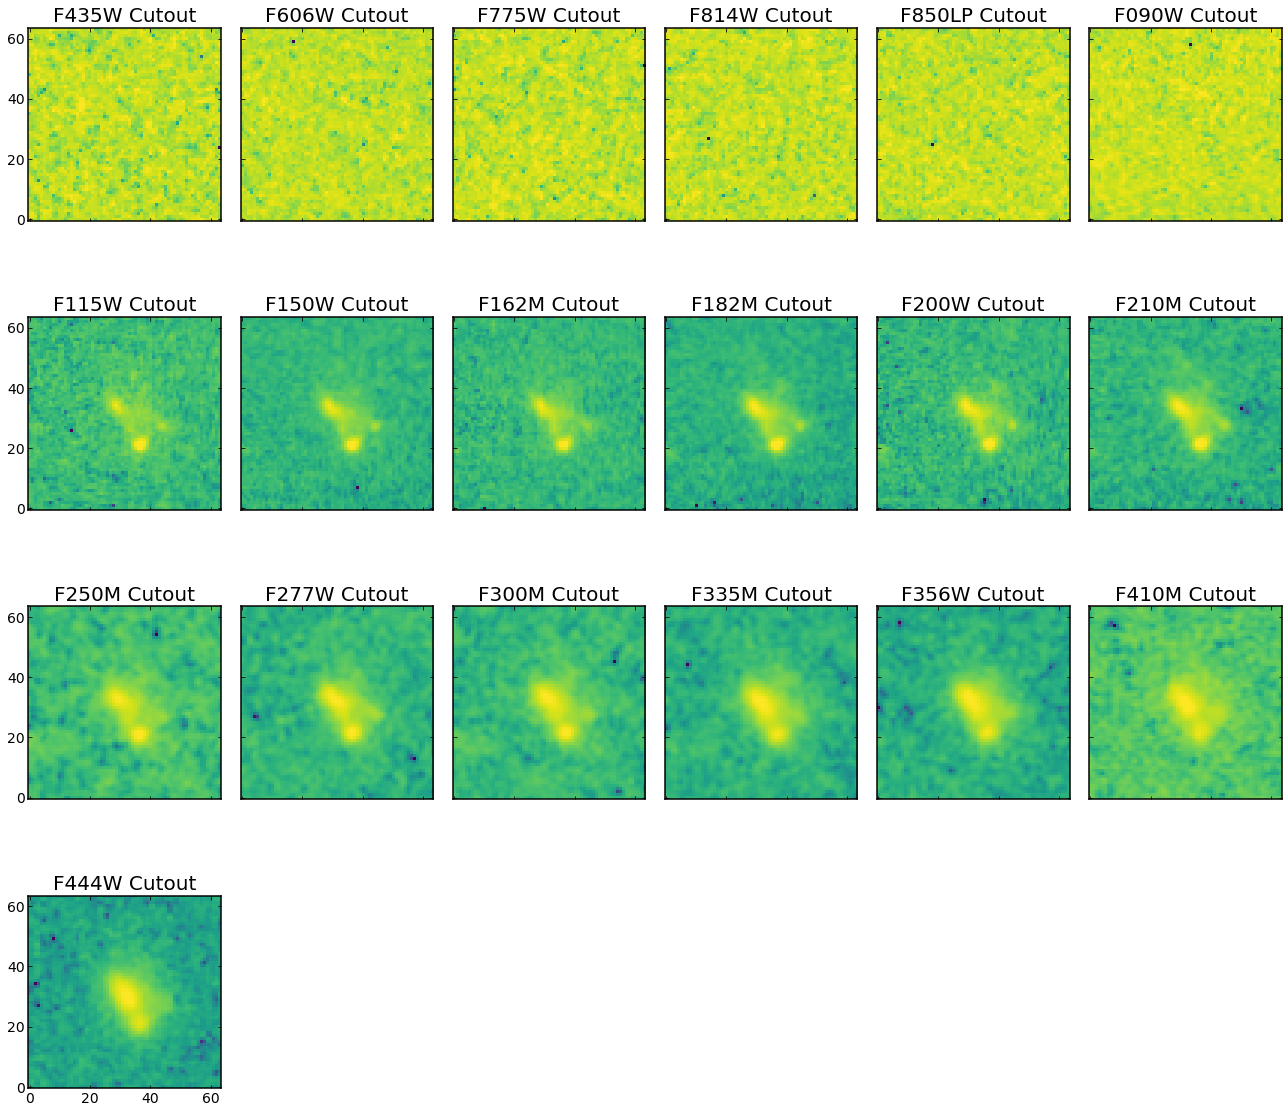

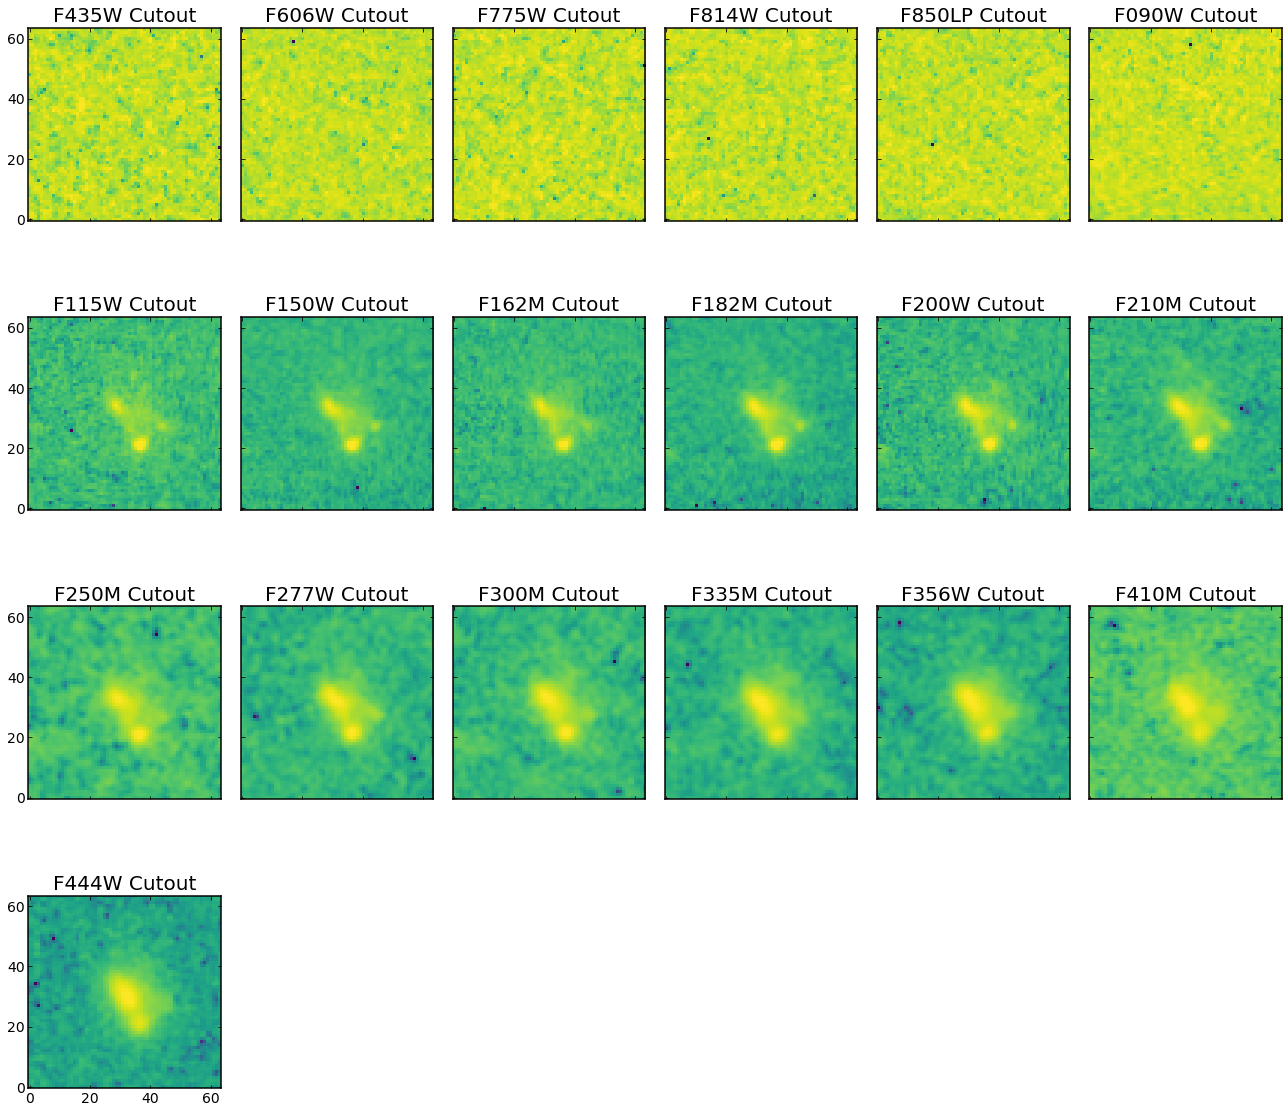

In [5]:
galaxy.plot_cutouts()

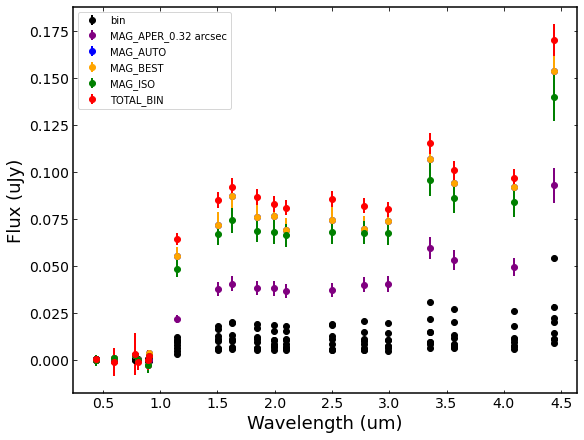

In [16]:
plt.rcParams['figure.dpi'] = 300
%matplotlib inline

galaxy.plot_photometry_bins()

plt.show()


In [11]:

print(tab)

None


In [9]:
# Simple test Bagpipes fit_instructions

sfh = {
    'age_max': (0.03, 1), # Gyr 
    'age_min': (0, 0.5), # Gyr
    'metallicity': (1e-3, 2.5), # solar
    'massformed': (4, 12), # log mstar/msun
    }

nebular = {}
nebular["logU"] = -2.0 

dust = {}
dust["type"] = "Calzetti"
dust["Av"] = (0, 5.0)

fit_instructions = {"t_bc":0.01,
                   "constant":sfh,
                   "nebular":nebular,
                   "dust":dust,  
                }
meta = {'run_name':'initial_test_cnst_sfh'}

overall_dict = {'meta': meta, 'fit_instructions': fit_instructions}

galaxy.run_bagpipes(overall_dict, overwrite=False)

Fixing redshift to 8.316405296325684
Fitting only all fluxes, which is 21 sources
Beginning fit
{'t_bc': 0.01, 'constant': {'age_max': (0.03, 1), 'age_min': (0, 0.5), 'metallicity': (0.001, 2.5), 'massformed': (4, 12)}, 'nebular': {'logU': -2.0}, 'dust': {'type': 'Calzetti', 'Av': (0, 5.0)}, 'redshift': 8.316405}
MultiNest not available. Switching to nautilus.

Bagpipes: fitting object 1


Completed in 156.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
constant:age_max               0.031      0.034      0.041
constant:age_min               0.000      0.000      0.001
constant:massformed            7.981      8.020      8.081
constant:metallicity           0.200      0.220      0.263
dust:Av                        0.739      0.779      0.818


Bagpipes: 1 out of 21 objects completed.
MultiNest not available. Switching to nautilus.

Bagpipes: fittin

rm: cannot remove ‘pipes/posterior/initial_test_cnst_sfh/JOF/5371/MAG_APER_0.32’: No such file or directory
rm: cannot remove ‘arcsec_*’: No such file or directory


Bagpipes: 21 out of 21 objects completed.


/nvme/scratch/work/tharvey/resolved_sedfitting/ResolvedGalaxy.py:2429: RuntimeWarning: invalid value encountered in log10
  weighted_val_area = np.log10(weighted_val_area.value)


Using band F150W at wavelength 15010.691851699 Angstrom for weighting at 13974.607944488525 Angstrom (rest frame 1500.0 Angstrom)
Using band F150W at wavelength 15010.691851699 Angstrom for weighting at 13974.607944488525 Angstrom (rest frame 1500.0 Angstrom)
Using band F150W at wavelength 15010.691851699 Angstrom for weighting at 13974.607944488525 Angstrom (rest frame 1500.0 Angstrom)
Using band F150W at wavelength 15010.691851699 Angstrom for weighting at 13974.607944488525 Angstrom (rest frame 1500.0 Angstrom)
Using band F150W at wavelength 15010.691851699 Angstrom for weighting at 13974.607944488525 Angstrom (rest frame 1500.0 Angstrom)
Using band F150W at wavelength 15010.691851699 Angstrom for weighting at 13974.607944488525 Angstrom (rest frame 1500.0 Angstrom)
Using band F150W at wavelength 15010.691851699 Angstrom for weighting at 13974.607944488525 Angstrom (rest frame 1500.0 Angstrom)
Using band F150W at wavelength 15010.691851699 Angstrom for weighting at 13974.60794448852

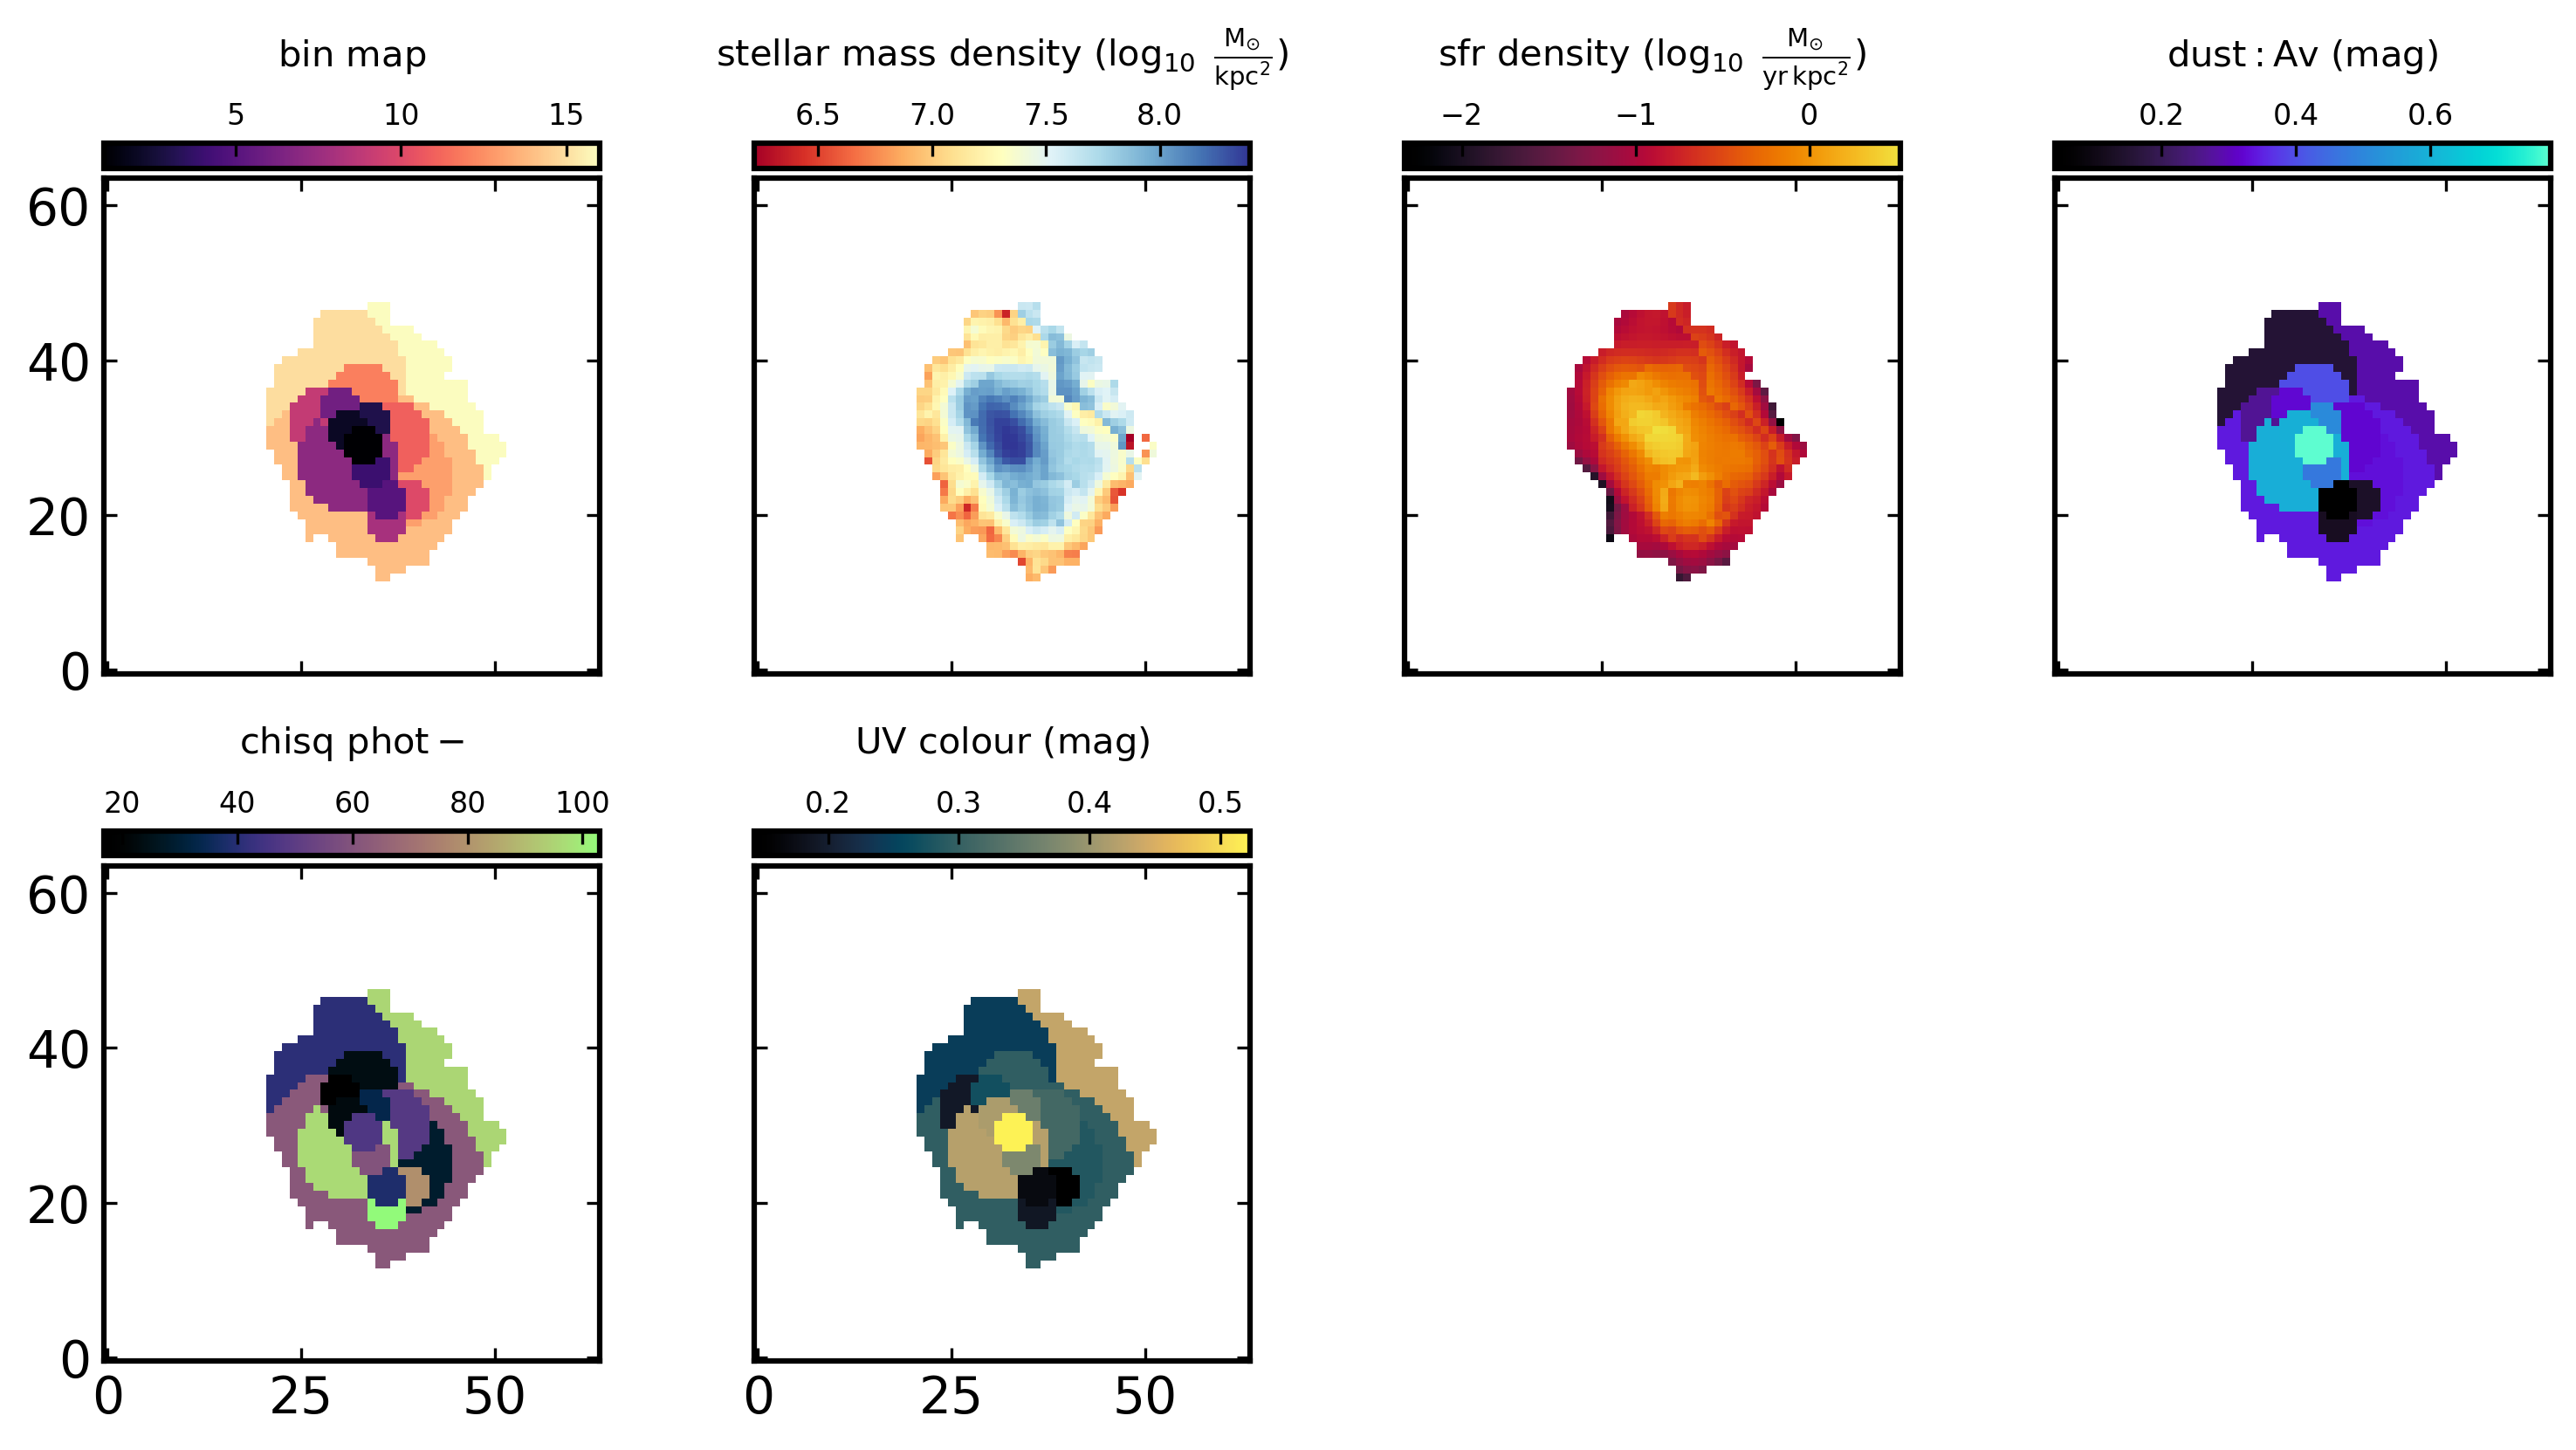

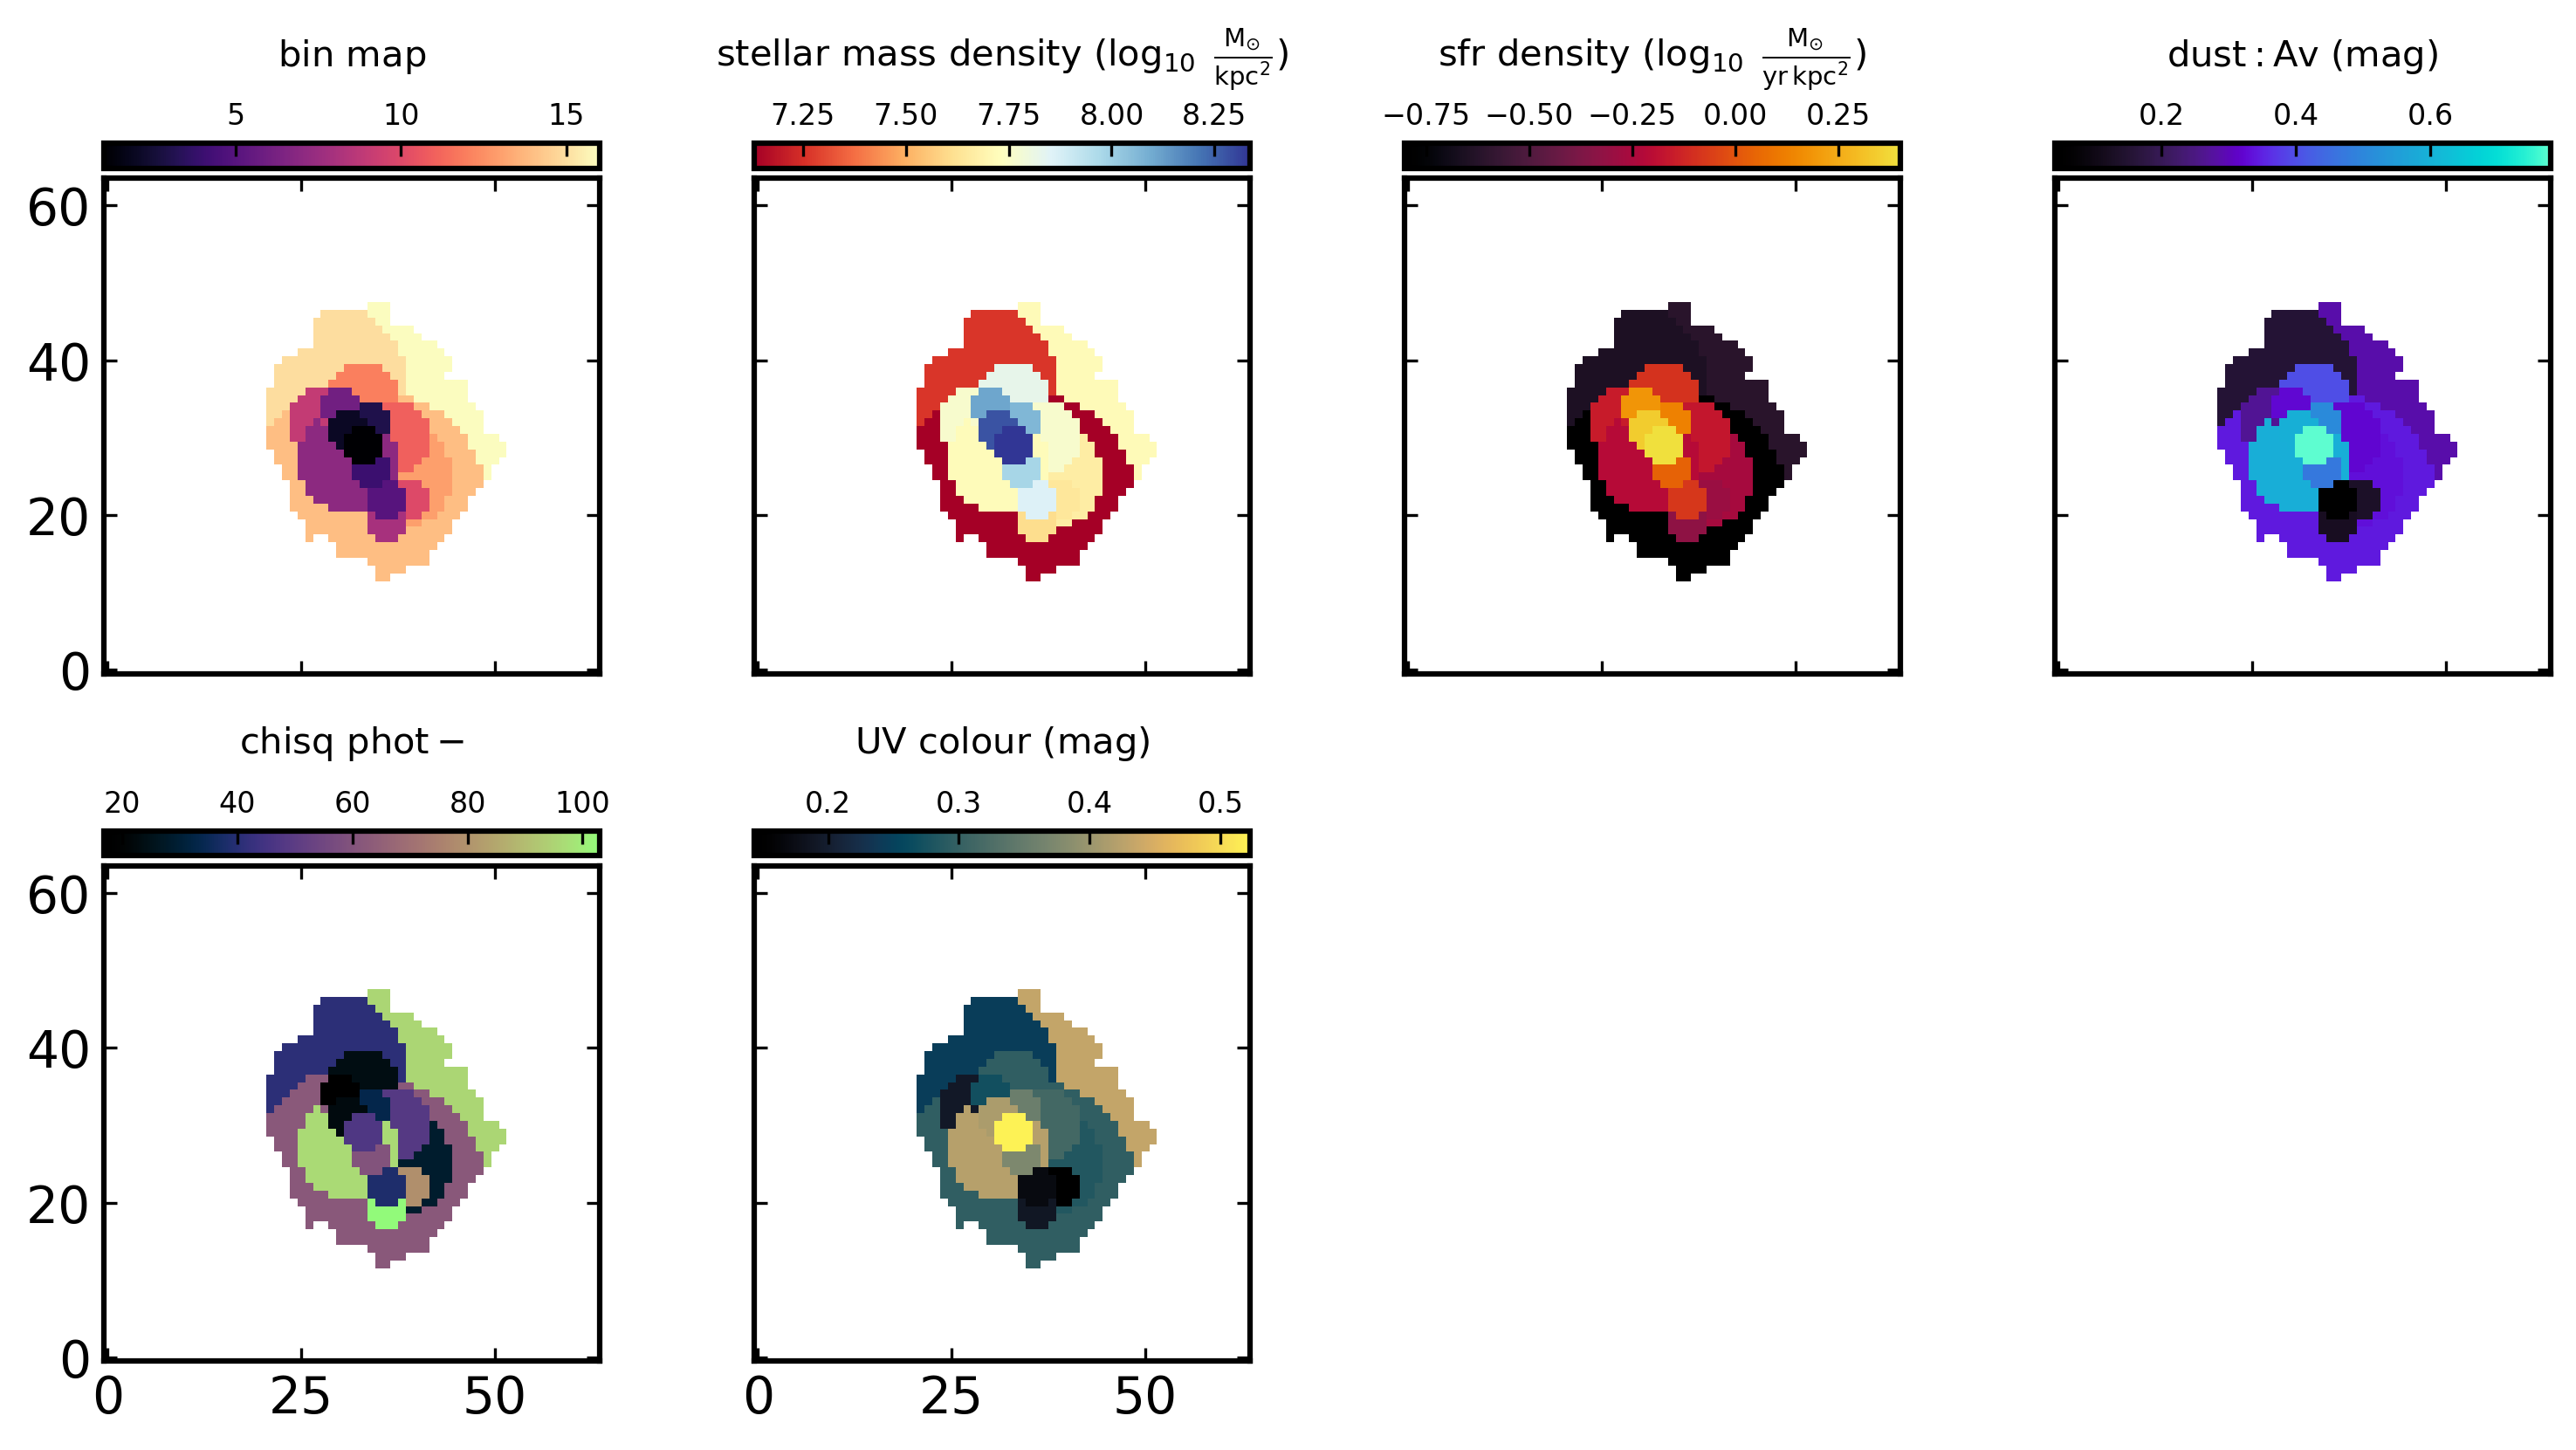

In [4]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
galaxy.plot_bagpipes_results('initial_test_cnst_sfh', reload_from_cat=False)
galaxy.plot_bagpipes_results('initial_test_cnst_sfh', reload_from_cat=False, weight_mass_sfr=False)
plt.show()

/nvme/scratch/work/tharvey/resolved_sedfitting/pipes_scripts/
No catalog provided. Output will be limited.
Changed directory to .
pipes//posterior/initial_test_cnst_sfh/JOF/5371/1.h5

Results loaded from pipes/posterior/plot_temp/1.h5

Fitting not performed as results have already been loaded from pipes/posterior/plot_temp/1.h5. To start over delete this file or change run.



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


$z:8.3^{}_{} \ \log{M_{*}}:8.0^{+0.1}_{-0.0} \ \chi^2:47.4$ (BP, constant SFH, Dust:uniform, Z: uniform)
{'1': (0.0, 0.0, 0.0, 1.0), '2': (0.04358445, 0.02474908, 0.06061196, 1.0), '3': (0.12175321, 0.06754789, 0.1723446, 1.0), '4': (0.19870231, 0.09539359, 0.3039249, 1.0), '5': (0.27617812, 0.09911739, 0.46664673, 1.0), '6': (0.34873478, 0.05179404, 0.66949545, 1.0), '7': (0.37838226, 0.07366794, 0.86055174, 1.0), '8': (0.33042661, 0.2625048, 0.90655861, 1.0), '9': (0.26111077, 0.39483025, 0.88790274, 1.0), '10': (0.19687454, 0.49684789, 0.86482134, 1.0), '11': (0.14480878, 0.58525167, 0.8499096, 1.0), '12': (0.10312014, 0.66841567, 0.84367273, 1.0), '13': (0.05808247, 0.75091799, 0.84255664, 1.0), '14': (0.01022949, 0.83491944, 0.84076663, 1.0), '15': (0.10430211, 0.91966031, 0.83138359, 1.0), '16': (0.37176267, 0.99245625, 0.8165214, 1.0), 'TOTAL_BIN': (0.24309136, 0.01863338, 0.08934888, 1.0), 'MAG_AUTO': (0.49928632, 0.13105642, 0.03379248, 1.0), 'MAG_ISO': (0.58779921, 0.39696294

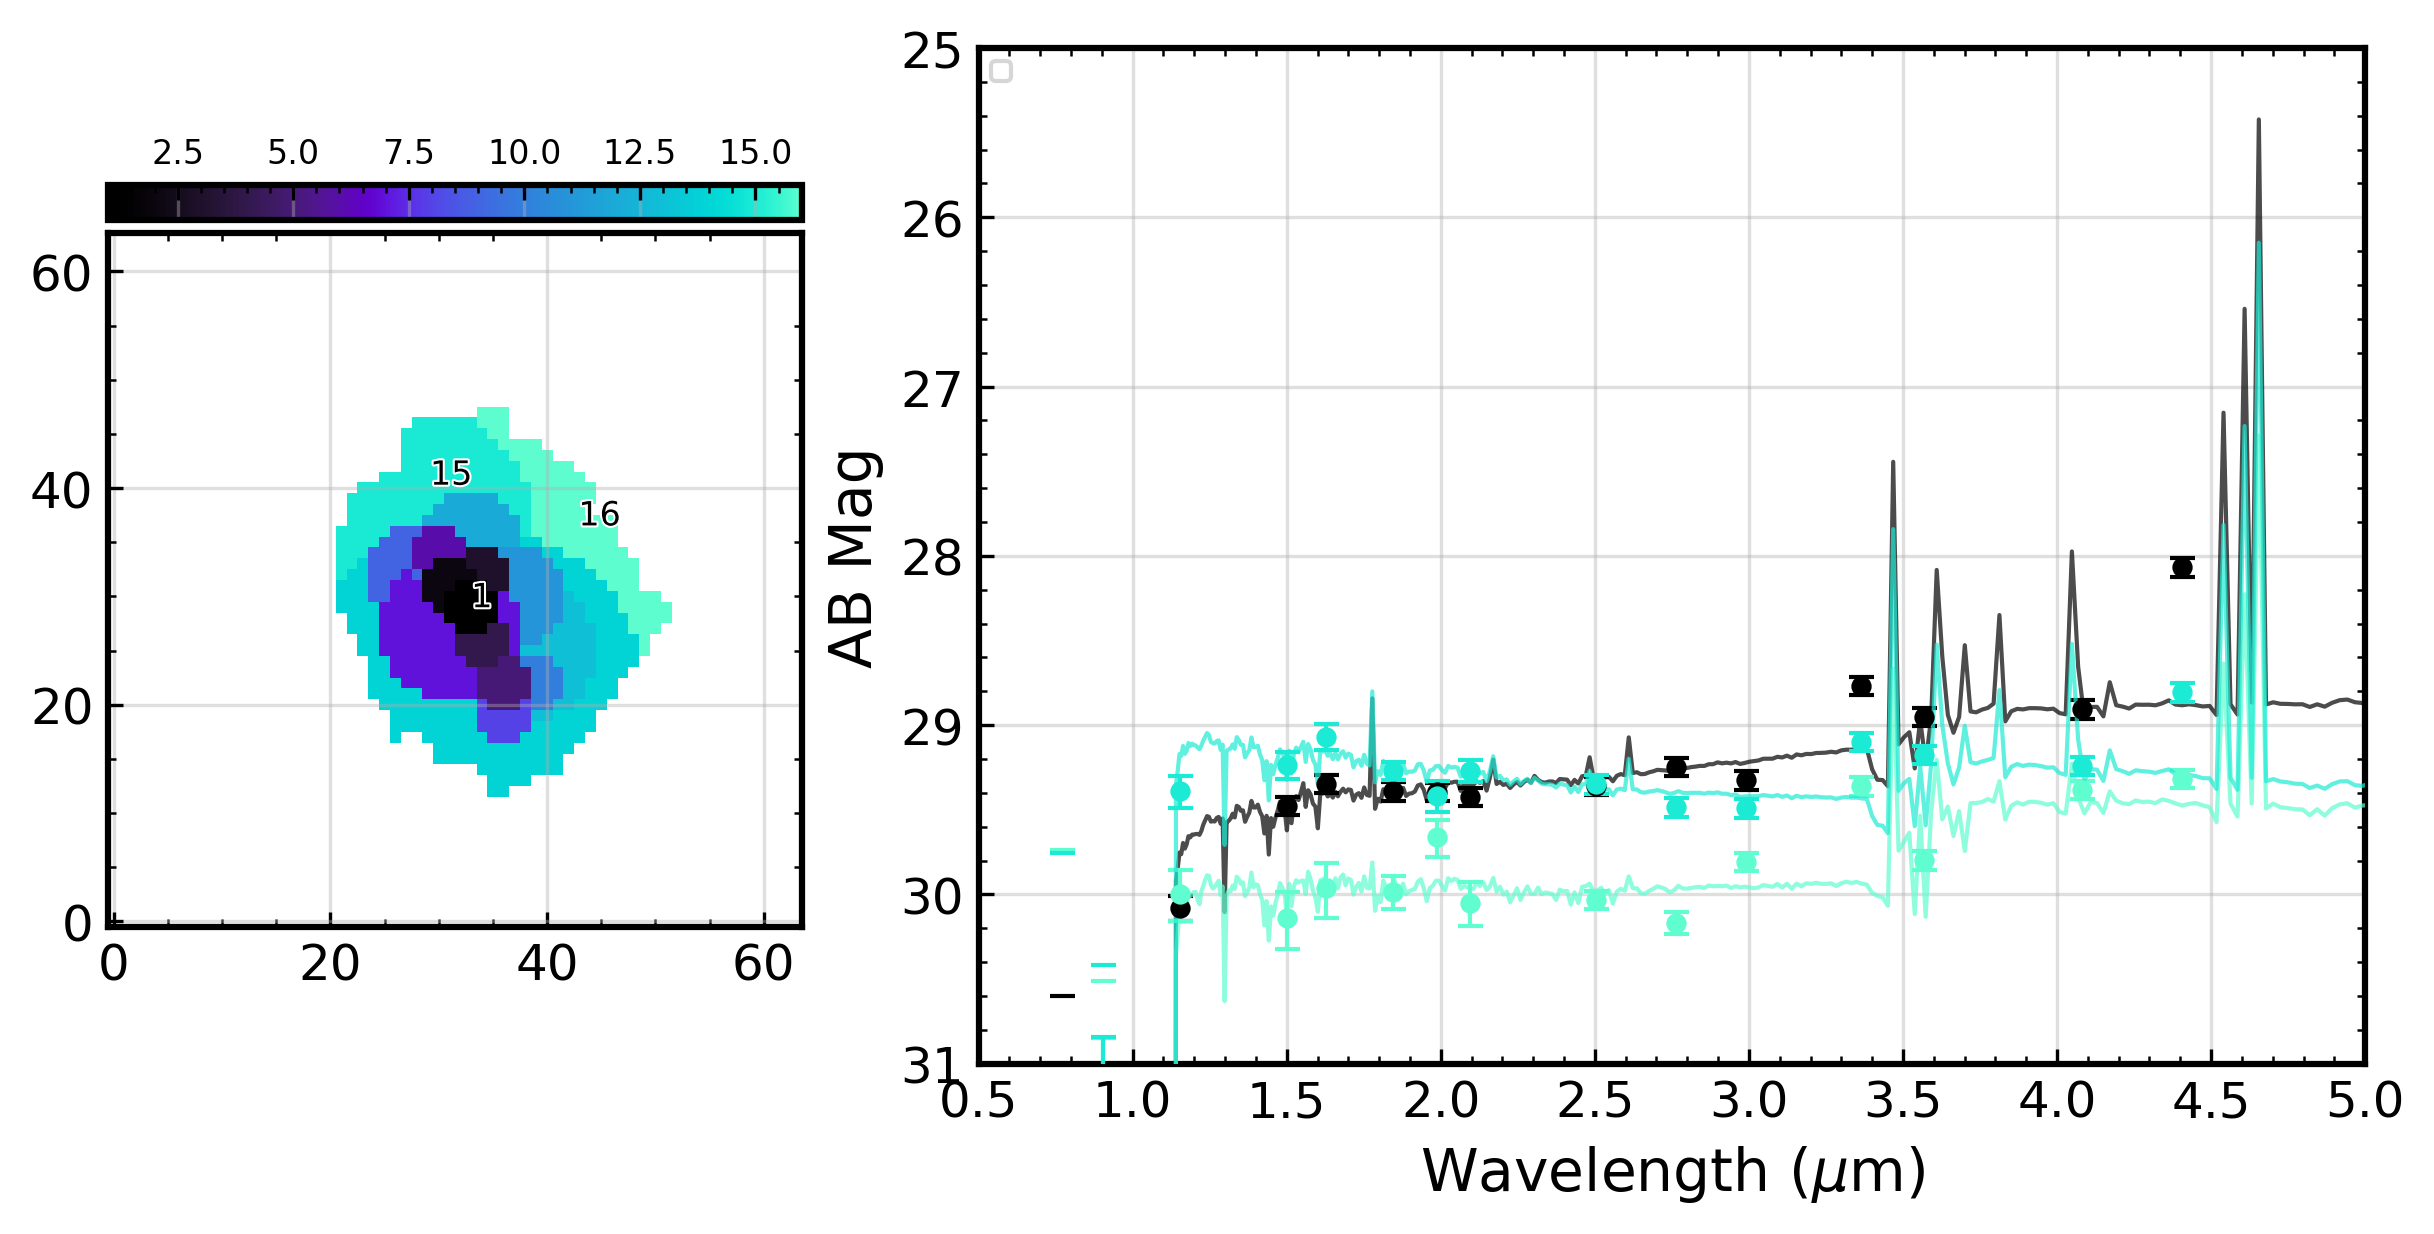

In [5]:
plt.rcParams['figure.dpi'] = 300
galaxy.plot_bagpipes_sed('initial_test_cnst_sfh', bins_to_show = [1, 16, 15]);

Combining 16 samples for stellar_mass
10000


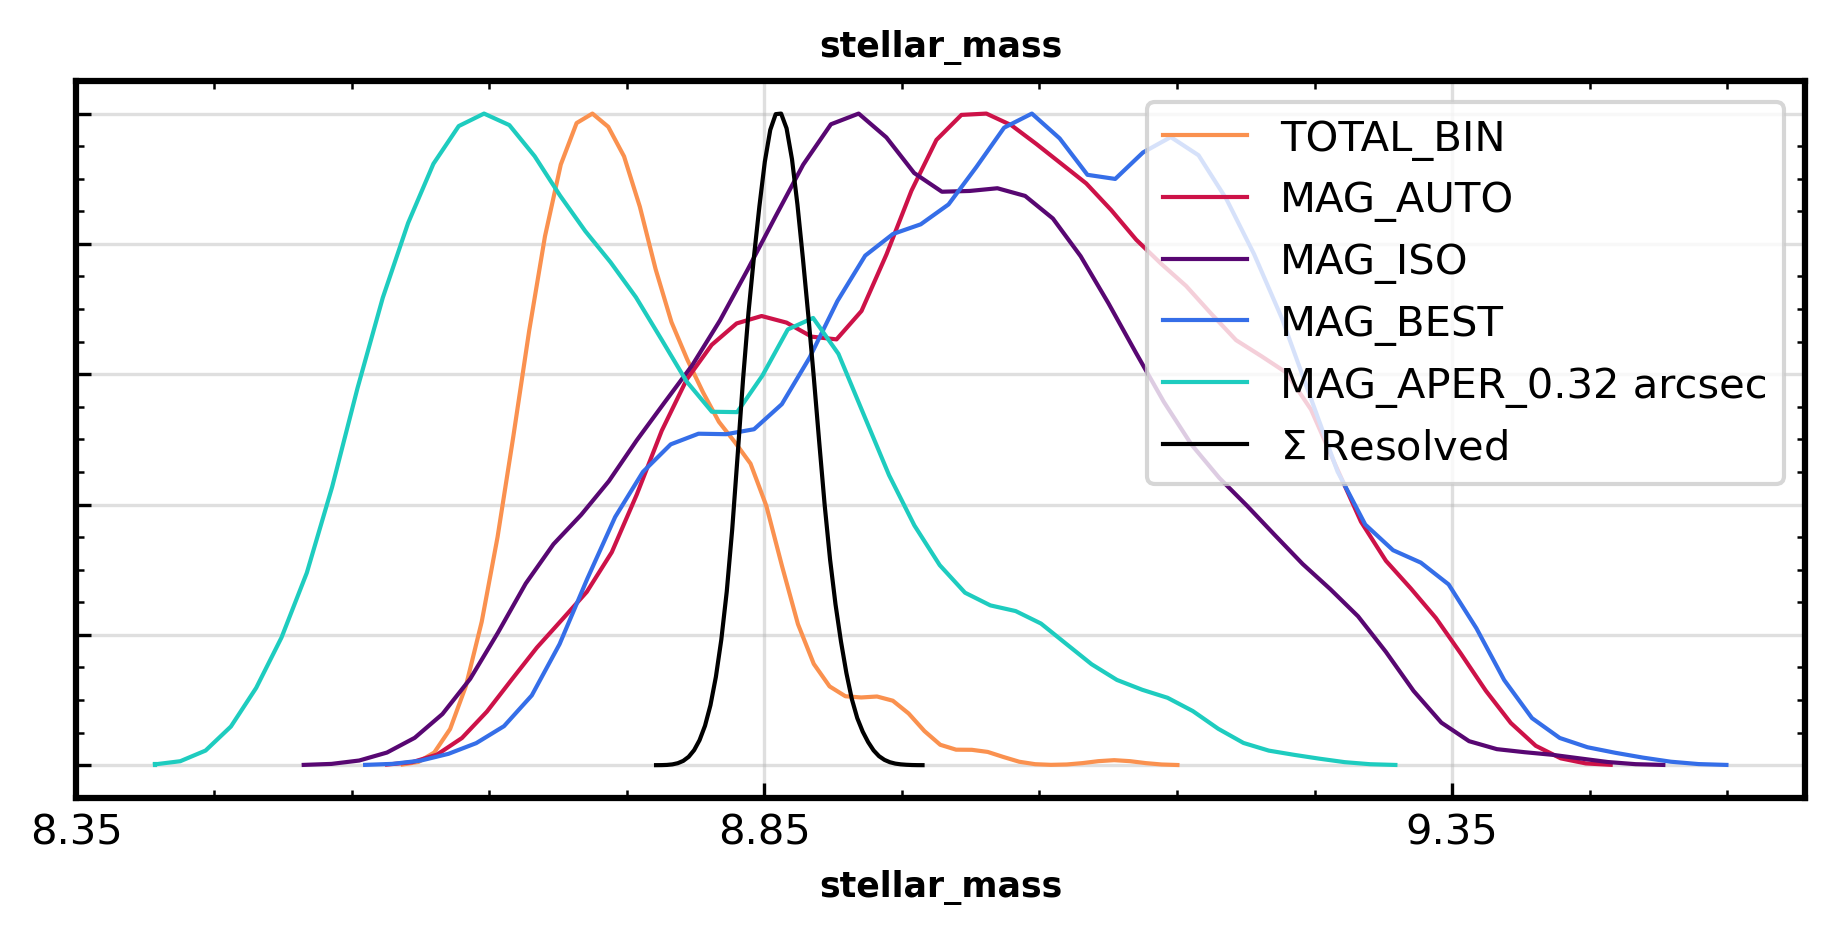

In [10]:
galaxy.plot_bagpipes_component_comparison(run_name = 'initial_test_cnst_sfh', n_draws=10000)

Starting dense_basis. please wait ~ a minute for the FSPS backend to initialize.
Bagpipes: PyMultiNest import failed, fitting will use the Nautilus sampler instead.
Using custom style
No catalog provided. Output will be limited.
Changed directory to .
pipes//posterior/initial_test_cnst_sfh/JOF/5371/1.h5

Results loaded from pipes/posterior/plot_temp/1.h5

Fitting not performed as results have already been loaded from pipes/posterior/plot_temp/1.h5. To start over delete this file or change run.

$z:8.3^{}_{} \ \log{M_{*}}:8.0^{+0.1}_{-0.0} \ \chi^2:47.4$ (BP, constant SFH, Dust:uniform, Z: uniform)
No catalog provided. Output will be limited.
Changed directory to .
pipes//posterior/initial_test_cnst_sfh/JOF/5371/10.h5

Results loaded from pipes/posterior/plot_temp/10.h5

Fitting not performed as results have already been loaded from pipes/posterior/plot_temp/10.h5. To start over delete this file or change run.

$z:8.3^{}_{} \ \log{M_{*}}:7.1^{+0.0}_{-0.0} \ \chi^2:79.1$ (BP, constant SF

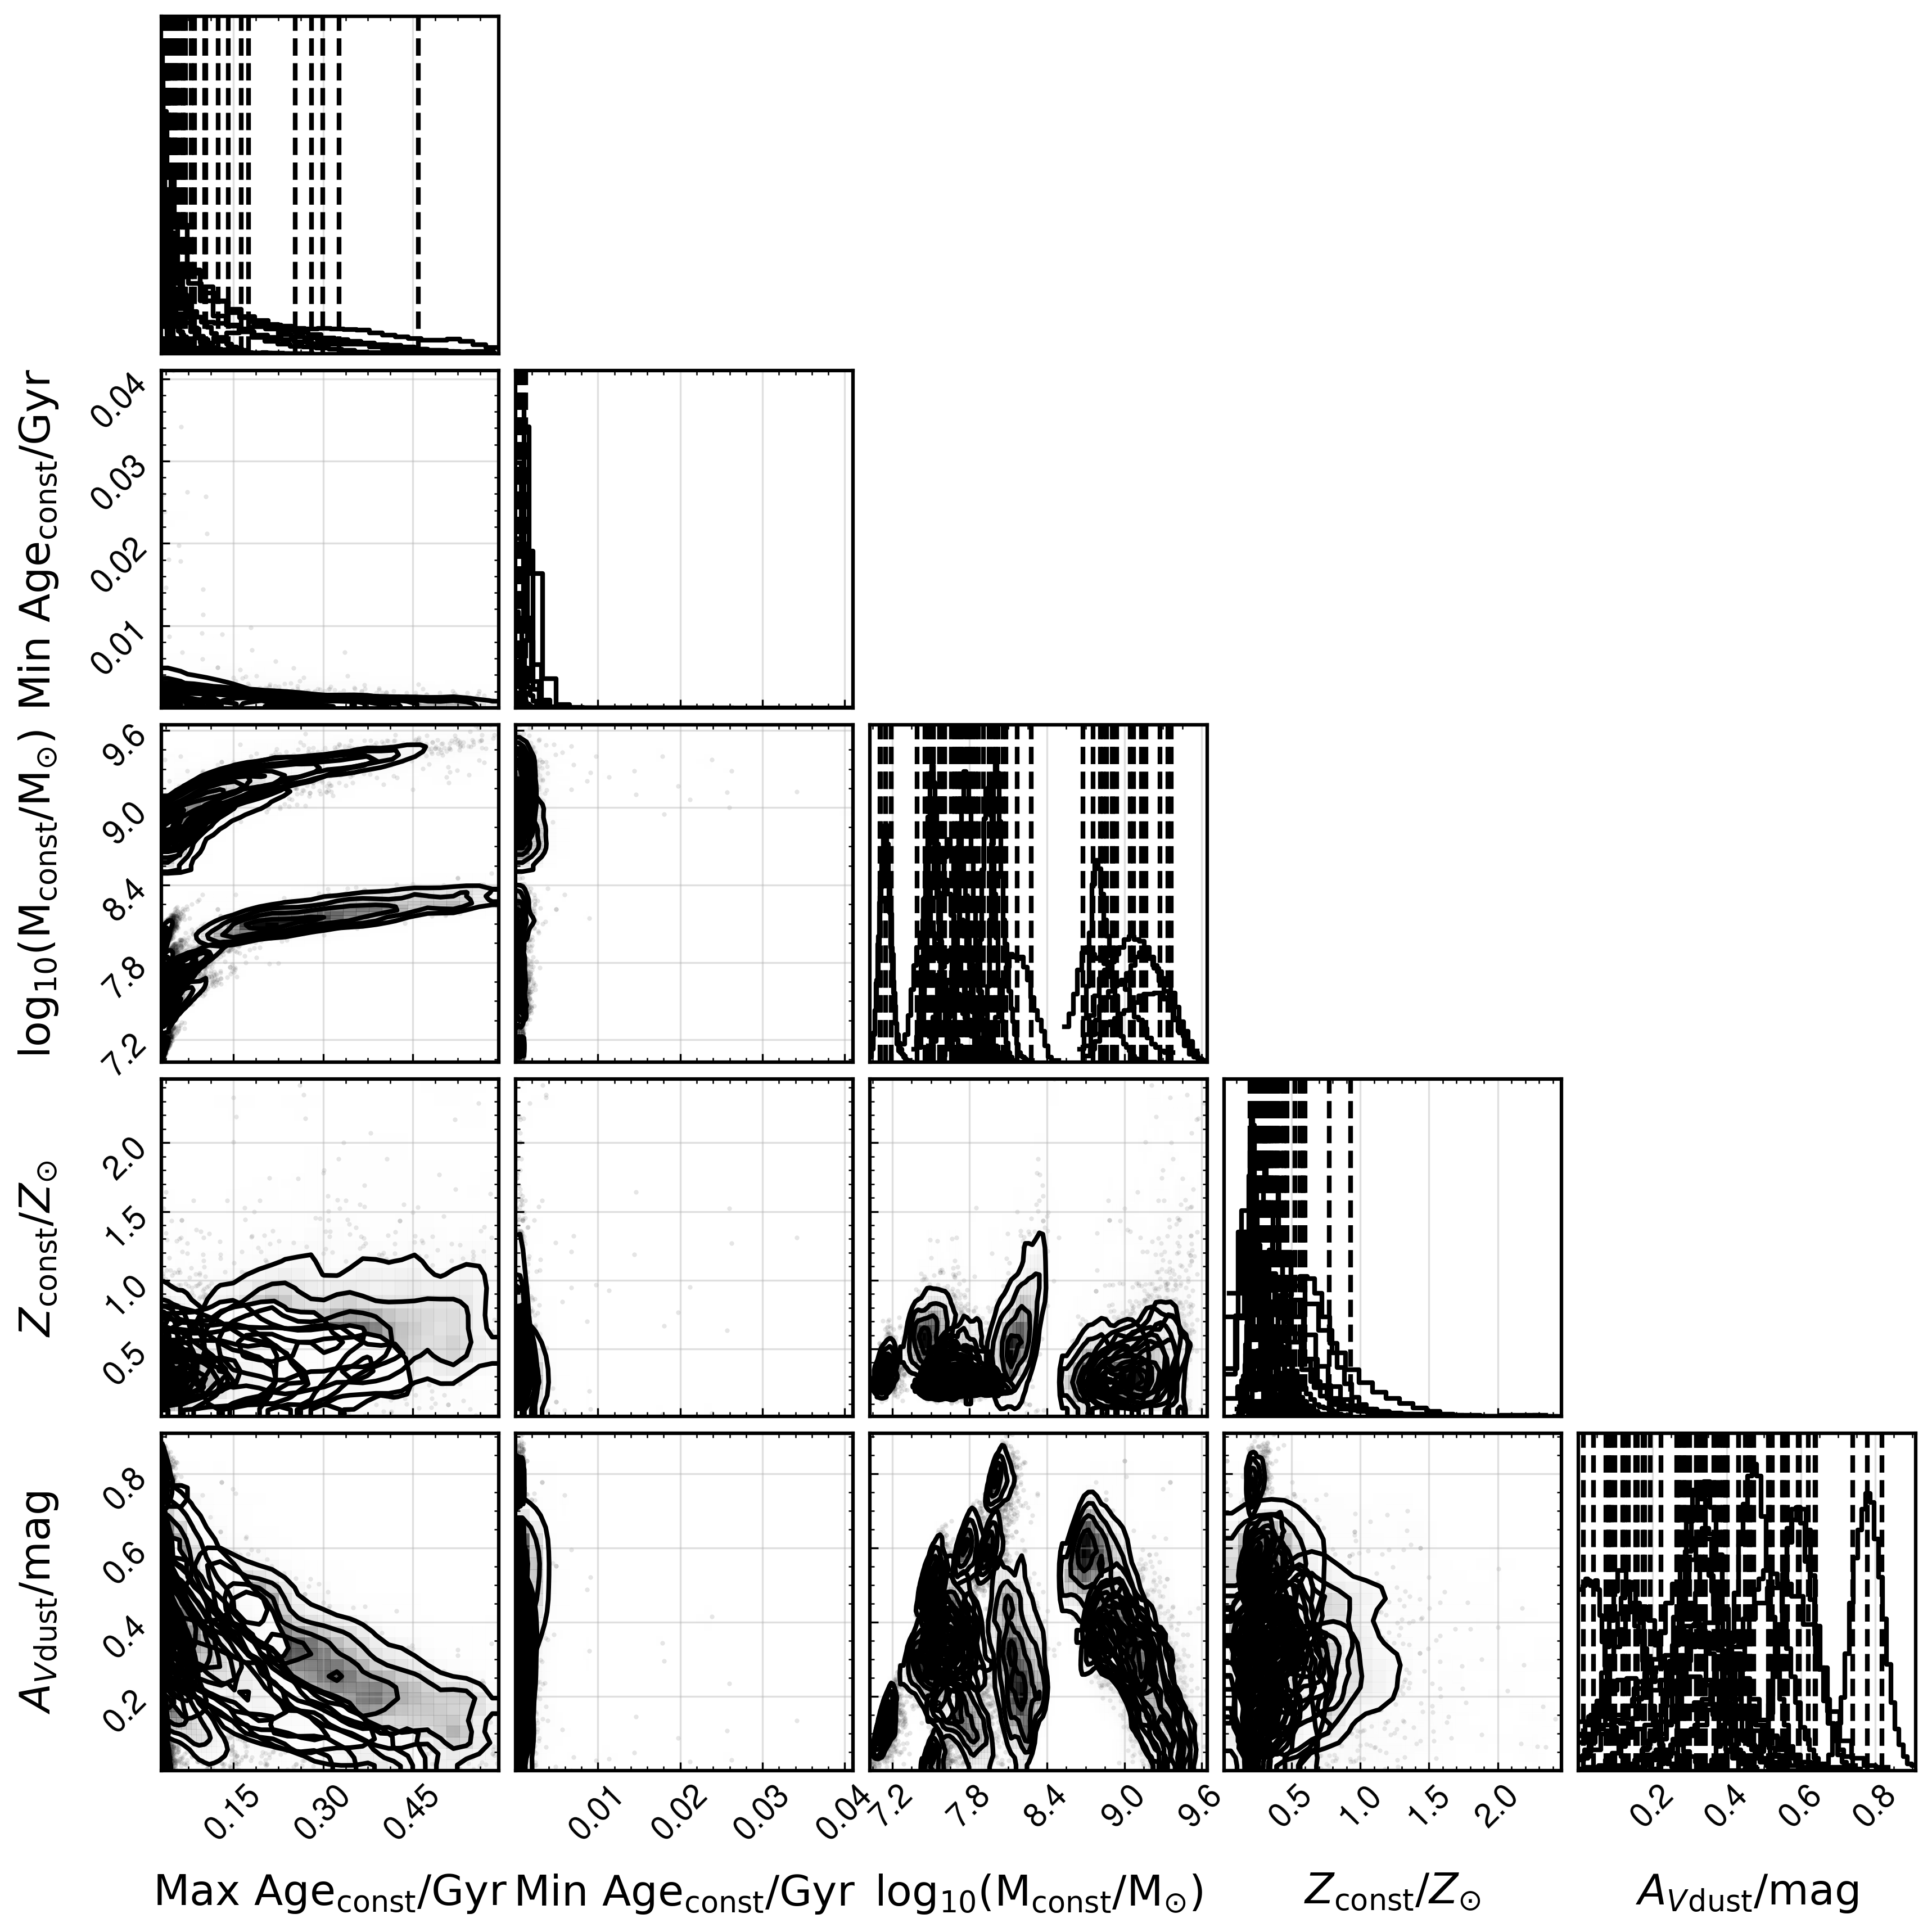

In [3]:
galaxy.plot_bagpipes_corner(run_name = 'initial_test_cnst_sfh');

/nvme/scratch/work/tharvey/resolved_sedfitting/pipes_scripts/
Running on Morgan.


INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.


Starting dense_basis. please wait ~ a minute for the FSPS backend to initialize.
Bagpipes: PyMultiNest import failed, fitting will use the Nautilus sampler instead.
Using custom style
No catalog provided. Output will be limited.
Changed directory to .
pipes//posterior/initial_test_cnst_sfh/JOF/5371/16.h5

Results loaded from pipes/posterior/plot_temp/16.h5

Fitting not performed as results have already been loaded from pipes/posterior/plot_temp/16.h5. To start over delete this file or change run.

$z:8.3^{}_{} \ \log{M_{*}}:8.0^{+0.1}_{-0.1} \ \chi^2:95.8$ (BP, constant SFH, Dust:uniform, Z: uniform)
/nvme/scratch/work/tharvey/resolved_sedfitting/pipes_scripts/
No catalog provided. Output will be limited.
Changed directory to .
pipes//posterior/initial_test_cnst_sfh/JOF/5371/MAG_APER_0.32 arcsec.h5

Results loaded from pipes/posterior/plot_temp/MAG_APER_0.32 arcsec.h5

Fitting not performed as results have already been loaded from pipes/posterior/plot_temp/MAG_APER_0.32 arcsec.h5. To s

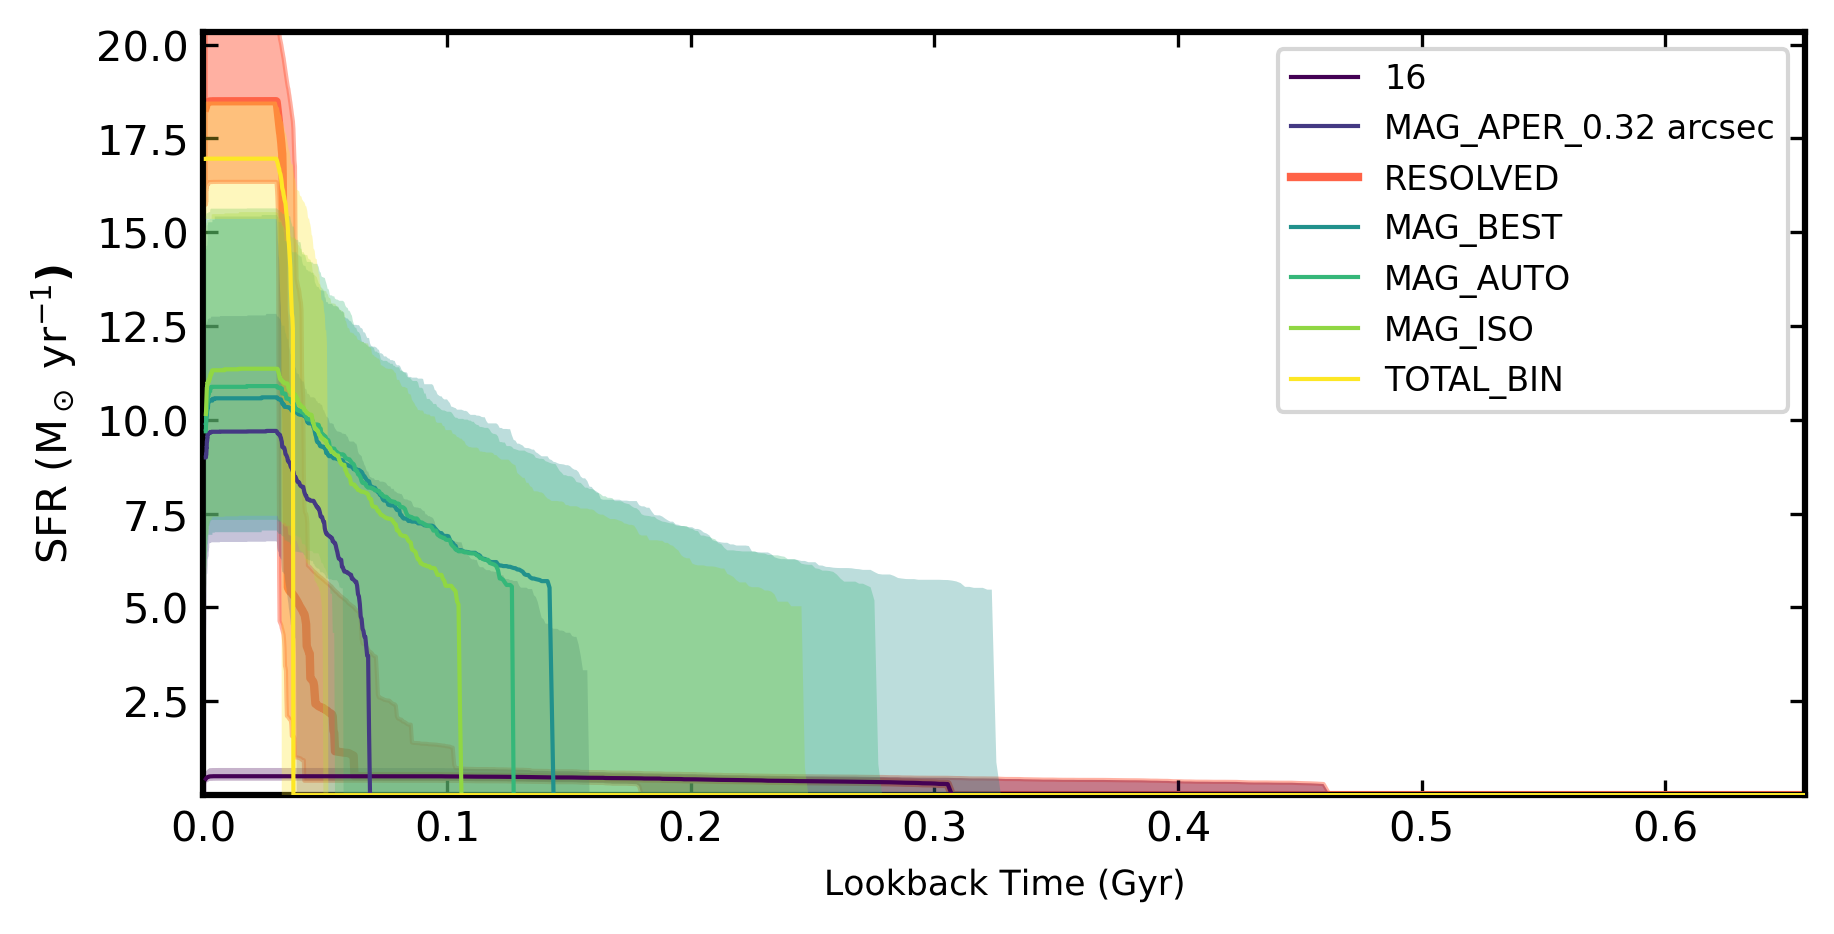

In [5]:
galaxy.plot_bagpipes_sfh(run_name = 'initial_test_cnst_sfh', bins_to_show=['16', 'MAG_APER_0.32 arcsec', 'RESOLVED', 'MAG_BEST', 'MAG_AUTO', 'MAG_ISO', 'TOTAL_BIN']);

In [1]:
table = galaxy.sed_fitting_table['bagpipes']['initial_test_cnst_sfh']
mask = [len(i) <= 2 for i in table['#ID']]
filtered_table = table[mask]

print(f'Combined stellar mass is log10 Mstar = {np.log10(np.sum(10**filtered_table["stellar_mass_50"])):.2f}')

NameError: name 'galaxy' is not defined

In [3]:
galaxy.init_galfind_phot()

Reading GALFIND config file from: /nvme/scratch/work/tharvey/galfind/galfind/configs/galfind_config.ini
Using PSF type star_stack
Using binmap type from argument pixedfit


100%|██████████| 21/21 [00:00<00:00, 77.89it/s]

Finished building galfind photometry


<bound method Photometry_rest.calc_SFR_UV_phot of <galfind.Photometry_rest.Photometry_rest object at 0x7f799da8feb0>>


100%|██████████| 17/17 [00:00<00:00, 415.20it/s]

PDFs for SFRobs_1500_M99_MD14 do not match shape of map, recalculating
PDFs for SFRobs_1500_M99_MD14 do not match shape of map, recalculating
PDFs for SFRobs_1500_M99_MD14 do not match shape of map, recalculating
PDFs for SFRobs_1500_M99_MD14 do not match shape of map, recalculating
PDFs for SFRobs_1500_M99_MD14 do not match shape of map, recalculating
PDFs for SFRobs_1500_M99_MD14 do not match shape of map, recalculating
PDFs for SFRobs_1500_M99_MD14 do not match shape of map, recalculating
PDFs for SFRobs_1500_M99_MD14 do not match shape of map, recalculating
PDFs for SFRobs_1500_M99_MD14 do not match shape of map, recalculating
PDFs for SFRobs_1500_M99_MD14 do not match shape of map, recalculating
PDFs for SFRobs_1500_M99_MD14 do not match shape of map, recalculating
PDFs for SFRobs_1500_M99_MD14 do not match shape of map, recalculating
PDFs for SFRobs_1500_M99_MD14 do not match shape of map, recalculating
PDFs for SFRobs_1500_M99_MD14 do not match shape of map, recalculating
PDFs f

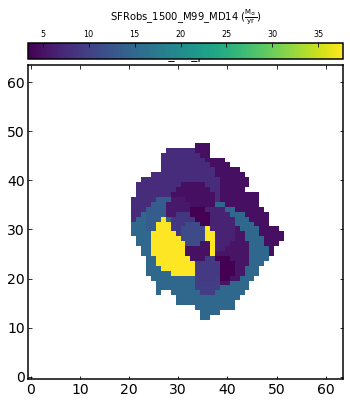

In [6]:
rest_UV_wav_lims = [1250., 3000.] * u.Angstrom
ref_wav =  1_500. * u.AA
conv_author_year = 'M99'
kappa_UV_conv_author_year = 'MD14'
dust_author_year = 'M99'
load_in = False
#galaxy.galfind_phot_property_map('beta_phot', rest_UV_wav_lims = rest_UV_wav_lims, load_in = load_in);
#galaxy.galfind_phot_property_map('mUV_phot', rest_UV_wav_lims = rest_UV_wav_lims, ref_wav = ref_wav, load_in = load_in);
'''
print(galaxy.galfind_photometry_rest[bin].flux_Jy)
print(galaxy.galfind_photometry_rest[bin].properties)

bin = 'TOTAL_BIN'
print(galaxy.galfind_photometry_rest[bin].flux_Jy)
print(galaxy.galfind_photometry_rest[bin].properties)
bin = 'MAG_APER_0.32 arcsec'


phot_obj = copy.deepcopy(galaxy.galfind_photometry_rest[bin])
func = phot_obj.calc_SFR_UV_phot
phot_obj._calc_property(func,rest_UV_wav_lims = rest_UV_wav_lims, frame = 'obs', iters = 150,
                        kappa_UV_conv_author_year = kappa_UV_conv_author_year, dust_author_year = dust_author_year,
                        ref_wav = ref_wav)
props = phot_obj.properties
print(props)
'''



#galaxy.galfind_phot_property_map('MUV_phot', rest_UV_wav_lims = rest_UV_wav_lims, ref_wav = ref_wav, load_in = load_in);
#galaxy.galfind_phot_property_map('SFR_UV_phot', rest_UV_wav_lims = rest_UV_wav_lims, frame = 'obs', iters = 150,
#                                kappa_UV_conv_author_year = kappa_UV_conv_author_year, dust_author_year = dust_author_year,
#                                ref_wav = ref_wav, density = True, logmap = True, load_in = load_in);



galaxy.galfind_phot_property_map('SFR_UV_phot', rest_UV_wav_lims = rest_UV_wav_lims, frame = 'obs', iters = 150,
                                kappa_UV_conv_author_year = kappa_UV_conv_author_year, dust_author_year = dust_author_year,
                                ref_wav = ref_wav, density = False);

#galaxy.galfind_photometry_rest['1'].get_rest_UV_phot(rest_UV_wav_lims).flux_Jy


In [4]:
print(galaxy.M1500.unit)

mag(AB)


In [19]:
galaxy.galfind_photometry_rest['5'].get_rest_UV_phot(rest_UV_wav_lims).flux_Jy_errs


<Quantity [2.28187857e-10, 2.57878667e-10, 1.50482297e-10, 2.26673169e-10,
           1.87681780e-10, 8.48014910e-11] Jy>

In [17]:
phot1 = galaxy.galfind_photometry_rest['1']

phot2 = galaxy.galfind_photometry_rest['2'].property_PDFs

print(phot1.get_rest_UV_phot(rest_UV_wav_lims).flux_Jy)

print(phot2)


[5.87336921e-09 6.61981878e-09 6.36255849e-09 6.33955394e-09
 6.17320710e-09 6.56347752e-09] Jy
{}


In [4]:
print(galaxy.available_em_lines)

plt.rcParams['figure.dpi'] = 300
galaxy.plot_ew_figure(medium_bands_only=False);


#galaxy.galfind_phot_property_map('EW_rest_optical', line_names = ['[OII]-3727'], medium_bands_only = False, plot=True);

['Hbeta', '[OIII]-4959', '[OIII]-5007', 'Halpha']


TypeError: Photometry_rest.calc_EW_rest_optical() got an unexpected keyword argument 'medium_bands_only'